# Project 1: Ames Housing EDA Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

To create a regression based model to predict the **housing price using the Ames Housing Dataset**.

[Link to data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Executive Summary

Backstory behind the Ames housing data set

## Go straight to Exploratory Data Analysis


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import graph style
plt.style.use('fivethirtyeight')

In [3]:
# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## Data Import and Cleaning

#### 1. Read In Data

Read in the`.csv` files

In [148]:
# Open the training set CSV data files
train_df = pd.read_csv('../datasets/train.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe

In [ ]:
# View first 10 rows
train_df.head()

In [ ]:
train_df.info()

#### Data Description

Answer: 

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from *2006 to 2010*.

A total of **2930 observations** and **81 columns** can be found in the data set.

Variables are categorized into the following:
* 23 nominal, 
* 23 ordinal, 
* 14 discrete
* 20 continuous variables 
* 2 additional observation identifiers

# Cleaning the dataset

In [ ]:
# Define a funtion to check the percentage of missing values
def pct_missing_value(data,col):
    missing_dict = dict()
    for c in col:
        missing_dict[c] = round((data[c].isnull().sum() / len(data[c])) * 100,2)
    return missing_dict

In [ ]:
dict_missing = pct_missing_value(train_df,['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'])
dict_missing

In [ ]:
missing_data_pct = pd.Series(dict_missing)
missing_data_pct.plot(kind='bar', figsize=(17,7), color='green', 
                      title='Mising values for each feature', xlabel='Features', ylabel='%');

Top missing values in the data set, **drop the columns with percentages greater than 80%**

These features need to be dropped: *'Pool QC', 'Misc Feature', 'Alley', 'Fence'

In [ ]:
train_df = train_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [ ]:
train_df.info()

In [ ]:
# Will use Id as reference when merging data frames 
train_df_id = train_df['Id'].copy()
train_df_id

In [ ]:
# Columns to drop: 'PID', no correlation with price
# Will use Id as reference when merging data frames 

train_df = train_df.drop(['Id','PID'], axis=1) 
train_df.head()

### Selecting the numeric variables

In [ ]:
# Select the numeric variables with int64, float64

# Overall Qual, Overall Cond are ordinal variables in the train_df_num, will need to drop them and add to the train_df_cat

train_df_num = train_df.select_dtypes(['int64', 'float64']).drop(['Kitchen AbvGr','Overall Qual', 'Overall Cond'], axis=1).copy()
train_df_num.head()

In [ ]:
# Overall Qual, Overall Cond are ordinal variables

train_df_num_overall_qual_cond = train_df[['Overall Qual', 'Overall Cond']]

### Selecting the categorical variables

In [ ]:
# Select the categorical variables
train_df_cat = train_df.select_dtypes(['object']).copy()
train_df_cat.head()

In [ ]:
# Not required as adding them back to the numeric variables
# Concatenating the train_df_num_ord with train_df_cat
# train_df_cat = pd.concat([train_df_cat, train_df_num_ord], axis=1)
# train_df_cat.head()

### Cleaning the train_df_num

In [ ]:
# Count the columns with values with 0's in them
train_df_with_0 = (((train_df_num.isin([0]).sum() / len(train_df_num)) * 100).sort_values(ascending=False)).iloc[:-9]

train_df_with_0.sort_values(ascending=False).plot(kind='bar', 
                                                  figsize=(11,7), title='Numeric Dataframe Columns with 0\'s in them', color='red');

In [ ]:
train_df_with_0

In [ ]:
# Find the correlation for features will 0's in them with SalePrice
train_df_with_0 = pd.concat([train_df[train_df_with_0.index],train_df['SalePrice']],axis=1)
train_df_with_0.head()

In [ ]:
def corr_heatmap(dataframe, label='test', cmap='coolwarm'):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(25,20))

    sns.heatmap(dataframe.corr(), annot=True, mask=mask, cmap=cmap, annot_kws={'fontsize':14})
    plt.title('Correlation of features of ' + label + ' variables')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

In [ ]:
# Heatmap correlation of columns with 0's with SalePrice

corr_heatmap(train_df_with_0, '0', 'icefire')

In [ ]:
def single_corr_heatmap(dataframe, feature, colormap='icefire'):
    df_corr = pd.DataFrame(dataframe.corr()[feature]).sort_values(feature, ascending=False)
    plt.figure(figsize=(11,7))
    sns.heatmap(df_corr, cmap=colormap, annot=True)
    if len(feature) > 1:
        plt.title('Correlation of numeric features with ' + ", ".join(feature), fontsize=15, pad=15)
    else:
        plt.title('Correlation of numeric features with ' + "".join(feature), fontsize=15, pad=15)
    plt.xlabel('')
    plt.ylabel('')

# single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [ ]:
single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [ ]:
train_df_with_0.columns

Based on the correlation heatmap, the following numeric columns with a lot of 0's in them have **very little correlation with price**:
* Pool Area (99.5%, 0.023) (Almost all houses do not have pools, will **drop pool related features**)
* 3Ssn Porch (98.7%, 0.049)
* Low Qual Fin SF (98.39%, -0.042)
* Misc Val (96.83%, -0.0074) (Almost all houses do not have Miscellaneous features)
* Bsmt Half Bath (93.7%, -0.045) 
* Screen Porch (91.17%, 0.13)
* BsmtFin SF 2 (87.9%, 0.016)
* Enclosed Porch (84.05%, -0.14)
* Bsmt Unf SF (8.04%, 0.19)

**These features will be dropped in train_df_num**

In [ ]:
# Drop the numeric columns with the most 0's and with the least correlation against price
train_df_num = train_df_num.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Bsmt Unf SF'], axis=1)
train_df_num.head()

In [ ]:
train_df_num.head()

In [ ]:
# Plot the heatmap of the numeric variables
# plt.figure(figsize=(11,7))
# sns.heatmap(data=train_df_num.corr()['SalePrice'],annot=True, cmap='viridis')

train_df_num.corr()['SalePrice'].sort_values(ascending=False)

In [ ]:
train_df_num.drop('SalePrice', axis=1, inplace=True)

In [ ]:
# Missing values in train_df_num
train_df_num.isnull().sum().sort_values(ascending=False) / len(train_df_num.isnull().sum().sort_values(ascending=False))

In [ ]:
train_df_num.head()

In [ ]:
# Mode of train_df_num for the missing discrete values in the columns
mode_values = train_df_num[['Garage Yr Blt', 'Garage Cars', 'Bsmt Full Bath']].mode().astype('int64')
mode_values

In [ ]:
# Mean of train_df_num for the missing continuous values in the columns
mean_values = dict(round(train_df_num[['Lot Frontage','Mas Vnr Area', 'Garage Area', 'BsmtFin SF 1','Total Bsmt SF']].mean(),2))
mean_values

In [ ]:
def agg_dict(dataframe):
    '''
    Creates a dictionary of the aggregated dataframe function
    '''
    new_dict = {}
    for index, key in enumerate(mode_values.keys()):
        new_dict[key] = mode_values.values.tolist().pop()[index]
    return new_dict

agg_dict(mode_values)

In [ ]:
train_df_num = train_df_num.fillna(agg_dict(mode_values)) # Fill the nulls values of the train_df_num with the mode values
train_df_num = train_df_num.fillna(mean_values) # Fill the nulls values of the train_df_num with the mean values
train_df_num.isnull().sum().sort_values(ascending=False)

In [ ]:
train_df_num.head()

In [ ]:
# Converting 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF' to float64 as they're continous values
train_df_num[['Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']] = train_df_num[['Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']].astype('float64')
train_df_num.head()

In [ ]:
# Converting Bsmt Full Bath, Garage Cars, Garage Yr Blt, Garage Cars to int64 as they're discrete values
train_df_num[['Bsmt Full Bath','Garage Cars','Garage Yr Blt']] = train_df_num[['Bsmt Full Bath','Garage Cars','Garage Yr Blt']] .astype('int64')
train_df_num.head()

In [ ]:
# 'MS SubClass' is a nominal variable
train_df_num.drop('MS SubClass', axis=1, inplace=True)

### Data cleaning on Categorical Variables

In [ ]:
train_df_cat.head()

In [ ]:
train_df_cat.columns

For train_df_cat,

**Nominal variables:**
* MS SubClass (Type of subclass)
* Ms Zoning
* Street (Gravel or Pavel) (Change to 0,1)
* Land Contour
* Lot Config
* Neighbourhood
* Condition 1 and Condition 2 (Proxmity to various locations)
* Bldg Type (Type of dwelling)
* House style (Type of dwelling)
* Roof Style
* Roof Matl
* Exterior 1st and Exterior 2nd
* Mas Vnr Type
* Foundation 
* Heating
* Central Air (Change to 0,1)
* Garage Type
* Sale Type


**Ordinal variables:**
* Lot Shape (Regular, slightly irregular ..)
* Utilities
* Land Slope (Gentle, moderate .. slope)
* Exter Qual (quality of the material on the exterior)
* Exter Cond (present condition of the material on the exterior)
* Bsmt Qual (height of the basement)
* Bsmt Exposure
* BsmtFin Type 1
* BsmtFin Type 2
* HeatingQC
* Electrical
 * SBrkr	Standard Circuit Breakers & Romex,  (5)
 * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	 (4)
 * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (3)
 * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (2)
 * Mix	Mixed (1)
* KitchenQual
* Kitchen AbvGr
* Functional (Home functionality)
* Garage Cond
* Paved Drive

In [ ]:
# Adding back MS SubClass, Kitchen AbvGr to train_df_Cat
train_df_cat.insert(0, 'MS SubClass', train_df['MS SubClass'])
train_df_cat.insert(30, 'Kitchen AbvGr', train_df['Kitchen AbvGr'])

In [ ]:
train_df_cat

In [ ]:
train_df_cat_null_pct = ((train_df_cat.isnull().sum() / len(train_df_cat)).sort_values(ascending=False) * 100).head(11)
train_df_cat_null_pct

In [ ]:
cat_null = train_df_cat_null_pct.index.tolist()
cat_null

In [ ]:
train_df_cat_null_pct.plot(kind='bar', figsize=(11,7),
                           title='Null values for each variable as a percentage',xlabel='Variables', ylabel='% format')

In [ ]:
# Mode of the columns with null values
mode_values = train_df_cat[cat_null].mode()
mode_values

In [ ]:
# Fill the null values with the mode of each column
train_df_cat = train_df_cat.fillna(agg_dict(mode_values))
train_df_cat.isnull().sum().sort_values(ascending=False)

### Need to split between Nominal and Ordinal variables into their dataframes

The Nominal variables will have one hot encoding while the Ordinal variables will have ordinal encoding

In [ ]:
# Nominal variables
train_df_cat_nom= train_df_cat[[
    'MS SubClass',
    'MS Zoning',
    'Street', 
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Condition 2', 
    'Bldg Type', 
    'House Style', 
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Garage Type',
    'Sale Type',
]].copy()

train_df_cat_nom.head()

In [ ]:
# Oridinal variables 
train_df_cat_ord = train_df_cat[[col for col in train_df_cat.columns if col not in train_df_cat_nom.columns]].copy()
train_df_cat_ord.head()

In [ ]:
# Nominal Variables
train_df_cat_nom.head()

In [ ]:
# Numeric variables, consists of discrete and continuous variables 
train_df_num.head()

#### Checking the data types for each feature

In [ ]:
# Numeric df
train_df_num.info()

In [ ]:
# Nominal variables
train_df_cat_nom.info()

In [ ]:
# Ordinal variables
train_df_cat_ord.info()

# Rename Columns

### Changing the column names for train_df_num, train_df_cat_ord and train_df_cat_nom to lower case and adding the underscores

In [ ]:
def add_underscore_char(words,add_prefix=''):
    '''
    This function will covert the strings to lower case and add the prefix names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
                new_dict[word] = add_prefix+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
add_underscore_char(train_df_num.columns, '2018_')

In [ ]:
# Rename numeric variable columns
train_df_num.rename(columns=add_underscore_char(train_df_num.columns), inplace=True)
train_df_num.head()

In [ ]:
# Rename nominal variable column
train_df_cat_nom.rename(columns=add_underscore_char(train_df_cat_nom.columns), inplace=True)
train_df_cat_nom.head()

In [ ]:
# Rename ordinal variable column
train_df_cat_ord.rename(columns=add_underscore_char(train_df_cat_ord.columns), inplace=True)
train_df_cat_ord.head()

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**|

# Need to do this, add in the range as well

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|State of the data| 
|sat_17_participation|float|SAT|State participation rate in 2017|
|sat_17_erw|integer|SAT|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|SAT|State average Math score in 2017|
|sat_17_total|integer|SAT|State average Total score in 2017|
|state|object|ACT|State of the data|
|act_17_participation|float|ACT|State participation rate in 2017|
|act_17_english|float|ACT|State average English score in 2017|
|act_17_math|float|ACT|State average Math score in 2017|
|act_17_reading|float|ACT|State average Reading score in 2017|
|act_17_science|float|ACT|State average Science score in 2017|
|act_17_composite|float|ACT|State average Composite score in 2017|

## Saving the different dataframes to csv files

In [ ]:
train_df_num.to_csv('../datasets/train_df_num.csv', index=False)
train_df_cat_nom.to_csv('../datasets/train_df_nom.csv', index=False)
train_df_cat_ord.to_csv('../datasets/train_df_ord.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Creating a quick overview of each numeric feature.

In [4]:
train_df_num = pd.read_csv('../datasets/train_df_num.csv')
train_df_nom = pd.read_csv('../datasets/train_df_nom.csv')
train_df_ord = pd.read_csv('../datasets/train_df_ord.csv')

In [151]:
# Add the SalePrice to get the correlation of the attributes
train_df_num['SalePrice'] = train_df['SalePrice']
train_df_num.head()

lot_frontage  lot_area  year_built  year_remod/add  mas_vnr_area  \
0         69.06   13517.0        1976            2005         289.0   
1         43.00   11492.0        1996            1997         132.0   
2         68.00    7922.0        1953            2007           0.0   
3         73.00    9802.0        2006            2007           0.0   
4         82.00   14235.0        1900            1993           0.0   

   bsmtfin_sf_1  total_bsmt_sf  1st_flr_sf  2nd_flr_sf  gr_liv_area  \
0         533.0          725.0       725.0       754.0       1479.0   
1         637.0          913.0       913.0      1209.0       2122.0   
2         731.0         1057.0      1057.0         0.0       1057.0   
3           0.0          384.0       744.0       700.0       1444.0   
4           0.0          676.0       831.0       614.0       1445.0   

   bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  totrms_abvgrd  \
0               0          2          1              3              6   
1               1          2          1              4              8   
2               1          1          0              3              5   
3               0          2          1              3              7   
4               0          2          0              3              6   

   fireplaces  garage_yr_blt  garage_cars  garage_area  wood_deck_sf  \
0           0           1976            2        475.0           0.0   
1           1           1997            2        559.0           0.0   
2           0           1953            1        246.0           0.0   
3           0           2007            2        400.0         100.0   
4           0           1957            2        484.0           0.0   

   open_porch_sf  mo_sold  yr_sold  SalePrice  
0           44.0        3     2010     130500  
1           74.0        4     2009     220000  
2           52.0        1     2010     109000  
3            0.0        4     2010     174000  
4           59.0        3     2010     138500

In [6]:
len(train_df_num.describe().T)

23

In [7]:
train_df_num.describe().T

count          mean          std     min     25%      50%  \
lot_frontage    2051.0     69.055973    21.306357    21.0    60.0    69.06   
lot_area        2051.0  10065.208191  6742.488909  1300.0  7500.0  9430.00   
year_built      2051.0   1971.708922    30.177889  1872.0  1953.5  1974.00   
year_remod/add  2051.0   1984.190151    21.036250  1950.0  1964.5  1993.00   
mas_vnr_area    2051.0     99.695953   174.021770     0.0     0.0     0.00   
bsmtfin_sf_1    2051.0    442.300488   461.091621     0.0     0.0   368.00   
total_bsmt_sf   2051.0   1057.987806   449.301078     0.0   793.0   995.00   
1st_flr_sf      2051.0   1164.488055   396.446923   334.0   879.5  1093.00   
2nd_flr_sf      2051.0    329.329108   425.671046     0.0     0.0     0.00   
gr_liv_area     2051.0   1499.330083   500.447829   334.0  1129.0  1444.00   
bsmt_full_bath  2051.0      0.427109     0.522589     0.0     0.0     0.00   
full_bath       2051.0      1.577279     0.549279     0.0     1.0     2.00   
half_bath       2051.0      0.371039     0.501043     0.0     0.0     0.00   
bedroom_abvgr   2051.0      2.843491     0.826618     0.0     2.0     3.00   
totrms_abvgrd   2051.0      6.435885     1.560225     2.0     5.0     6.00   
fireplaces      2051.0      0.590931     0.638516     0.0     0.0     1.00   
garage_yr_blt   2051.0   1980.169186    25.447222  1895.0  1962.0  1985.00   
garage_cars     2051.0      1.776694     0.764367     0.0     1.0     2.00   
garage_area     2051.0    473.671706   215.881887     0.0   319.0   480.00   
wood_deck_sf    2051.0     93.833740   128.549416     0.0     0.0     0.00   
open_porch_sf   2051.0     47.556802    66.747241     0.0     0.0    27.00   
mo_sold         2051.0      6.219893     2.744736     1.0     4.0     6.00   
yr_sold         2051.0   2007.775719     1.312014  2006.0  2007.0  2008.00   

                    75%       max  
lot_frontage       78.0     313.0  
lot_area        11513.5  159000.0  
year_built       2001.0    2010.0  
year_remod/add   2004.0    2010.0  
mas_vnr_area      159.0    1600.0  
bsmtfin_sf_1      733.5    5644.0  
total_bsmt_sf    1318.5    6110.0  
1st_flr_sf       1405.0    5095.0  
2nd_flr_sf        692.5    1862.0  
gr_liv_area      1728.5    5642.0  
bsmt_full_bath      1.0       3.0  
full_bath           2.0       4.0  
half_bath           1.0       2.0  
bedroom_abvgr       3.0       8.0  
totrms_abvgrd       7.0      15.0  
fireplaces          1.0       4.0  
garage_yr_blt    2004.0    2207.0  
garage_cars         2.0       5.0  
garage_area       576.0    1418.0  
wood_deck_sf      168.0    1424.0  
open_porch_sf      70.0     547.0  
mo_sold             8.0      12.0  
yr_sold          2009.0    2010.0

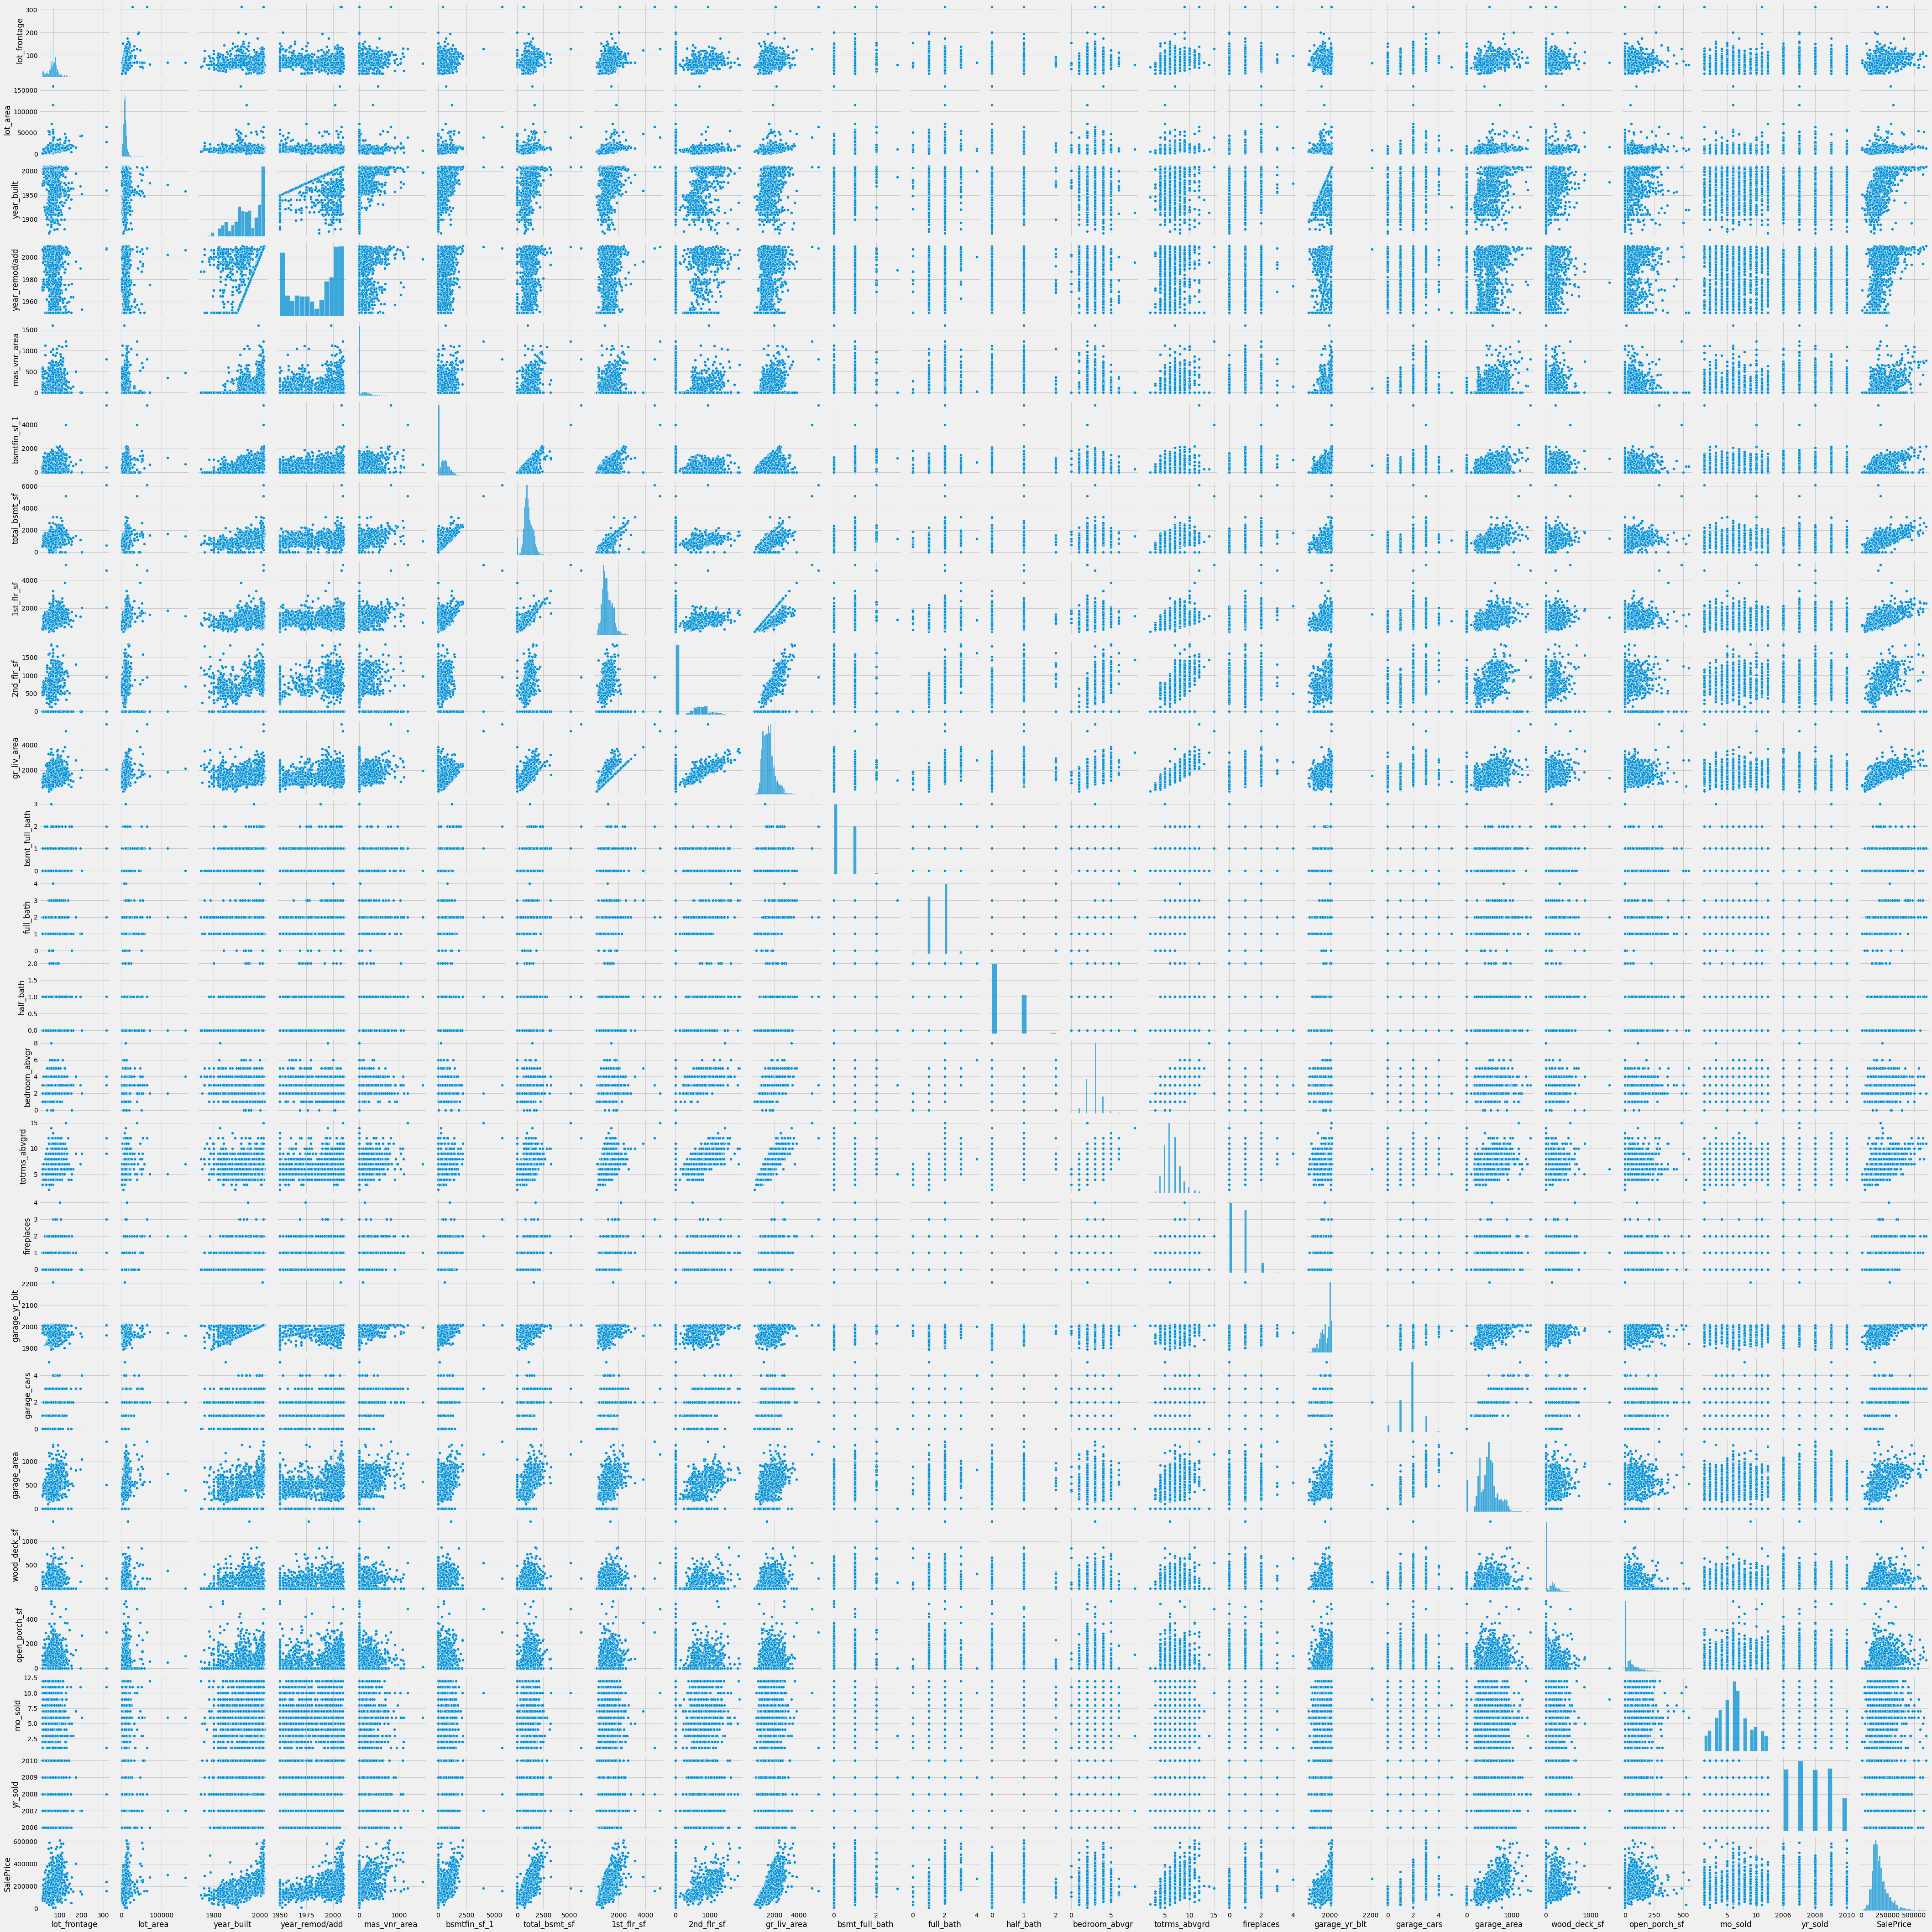

In [152]:
sns.pairplot(train_df_num)

Some notable attributes that have correlations from the pairplots are:
* lot_area
* lot_frontage
* bsmtfin_sf_1
* total_bsmt_sf
* mas_vnr_area
* 1st_flr_sf
* 2nd_flr_sf 	
* gr_liv_area
* garage_area

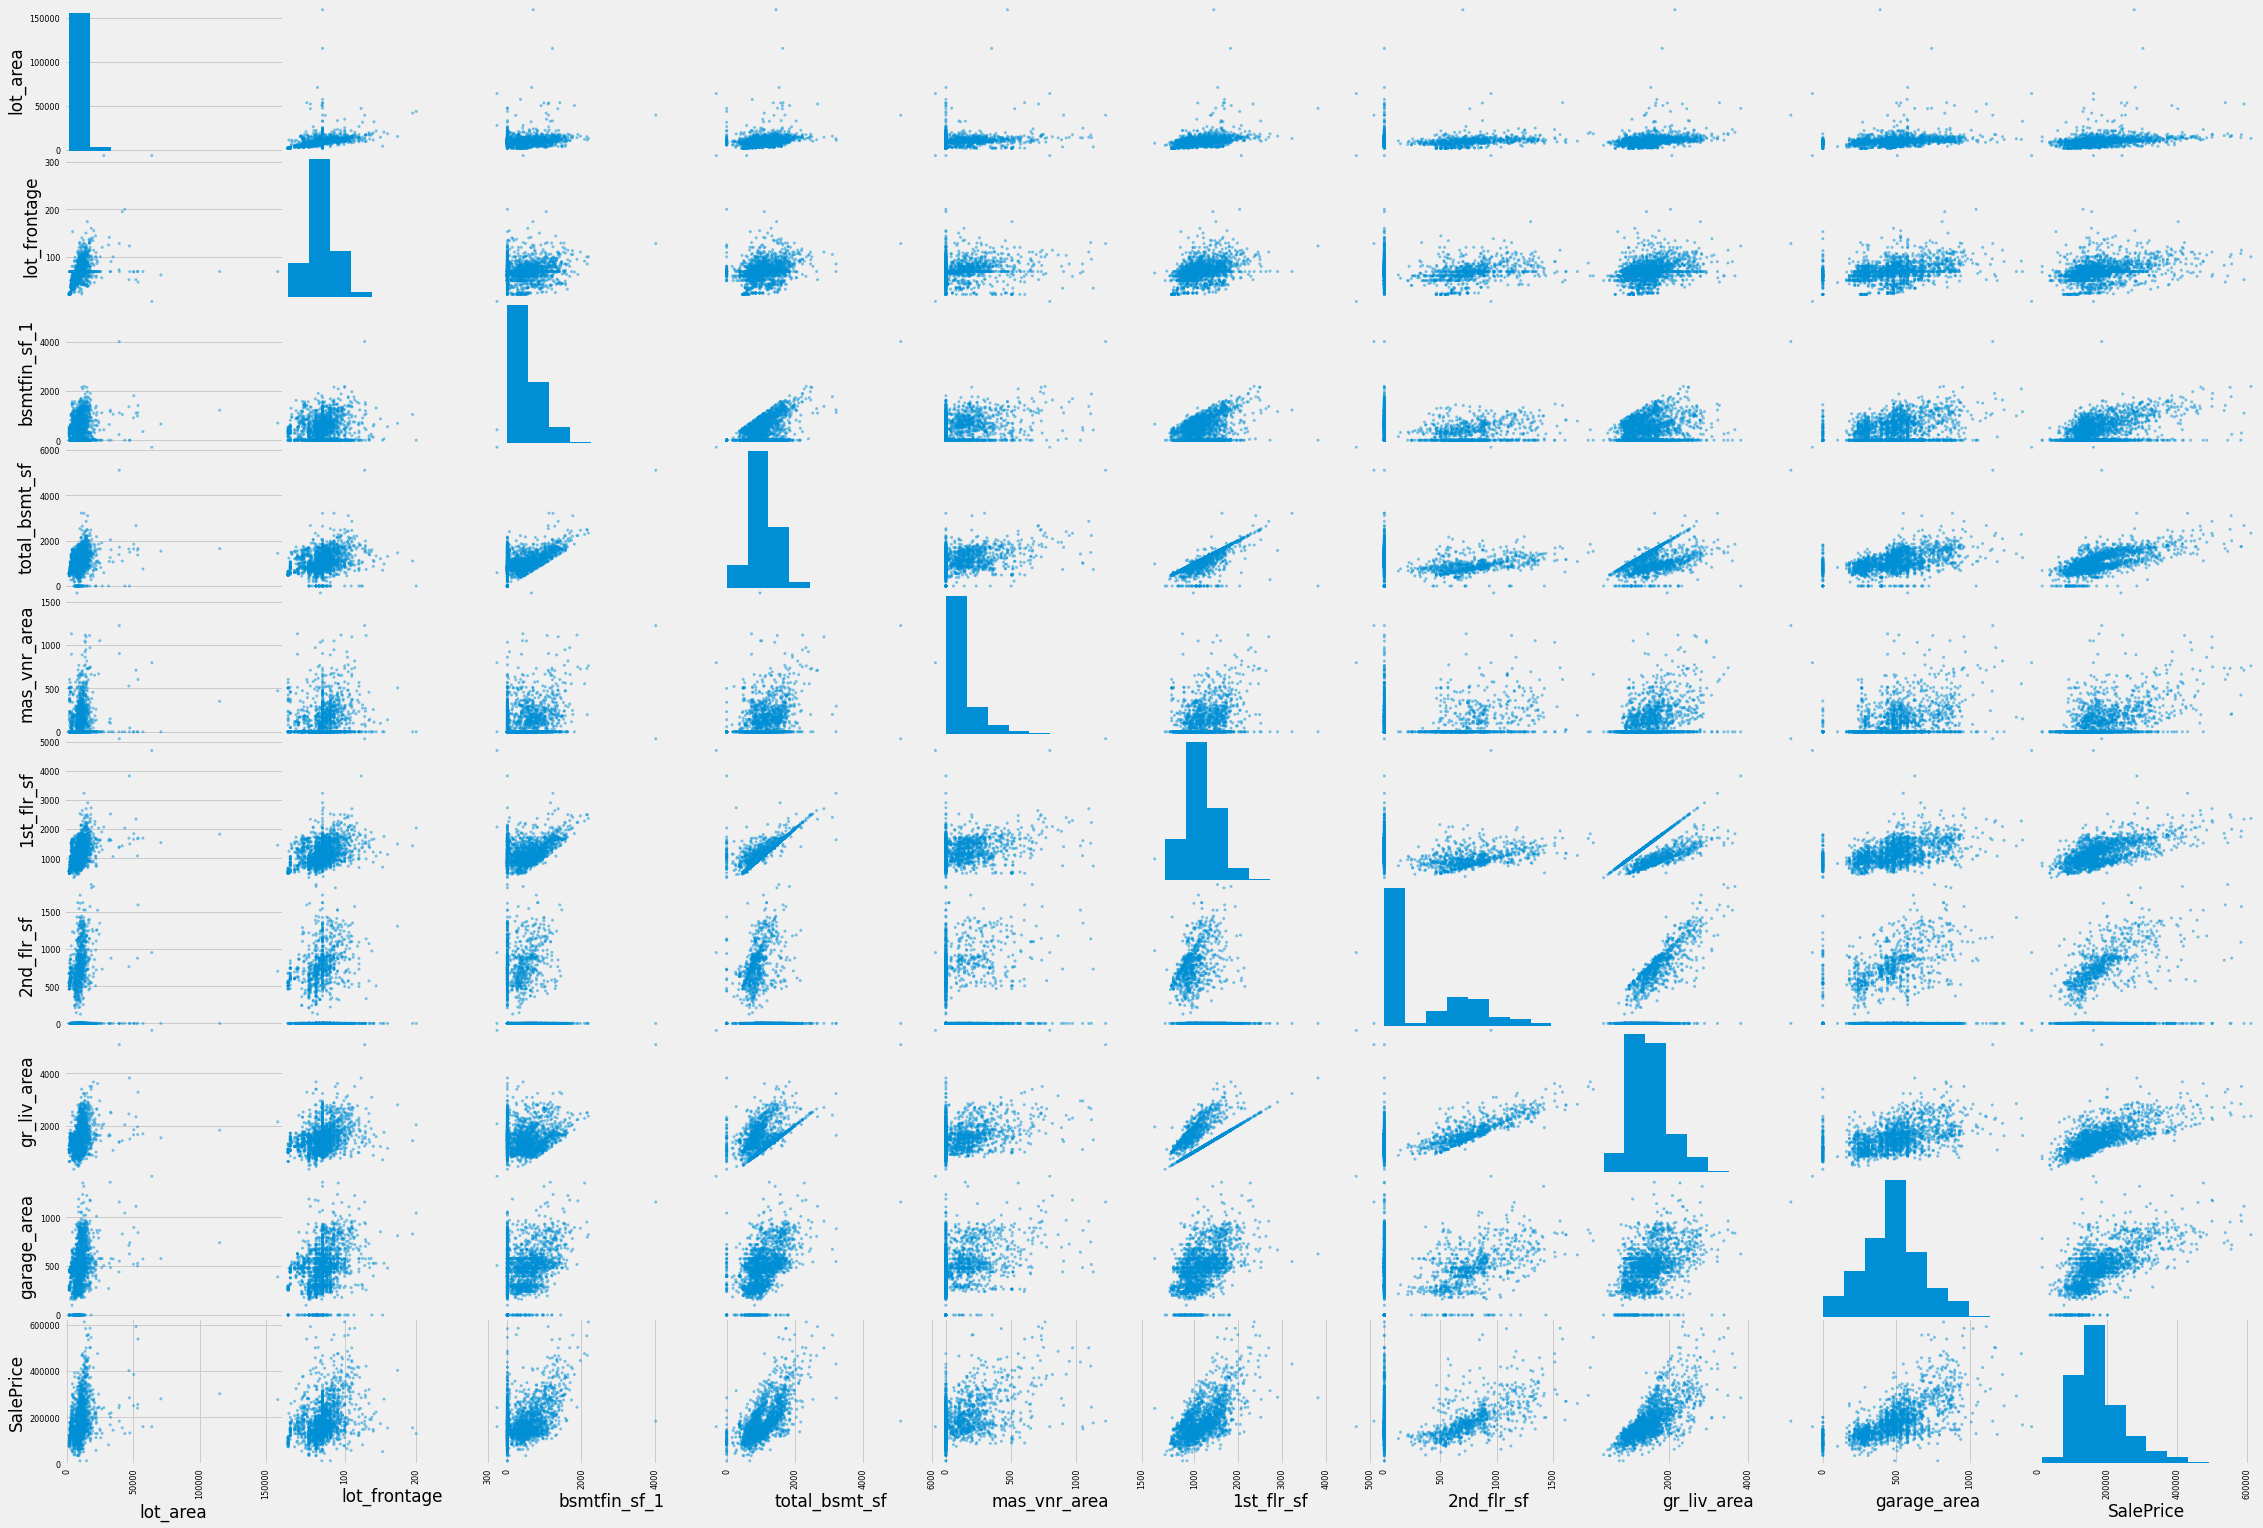

In [157]:
from pandas.plotting import scatter_matrix

attributes = [
    "lot_area",
    "lot_frontage",
    "bsmtfin_sf_1",
    "total_bsmt_sf",
    "mas_vnr_area",
    "1st_flr_sf",
    "2nd_flr_sf",
    "gr_liv_area",
    "garage_area",
    "SalePrice"
]

scatter_matrix(train_df_num[attributes], figsize=(35,25));

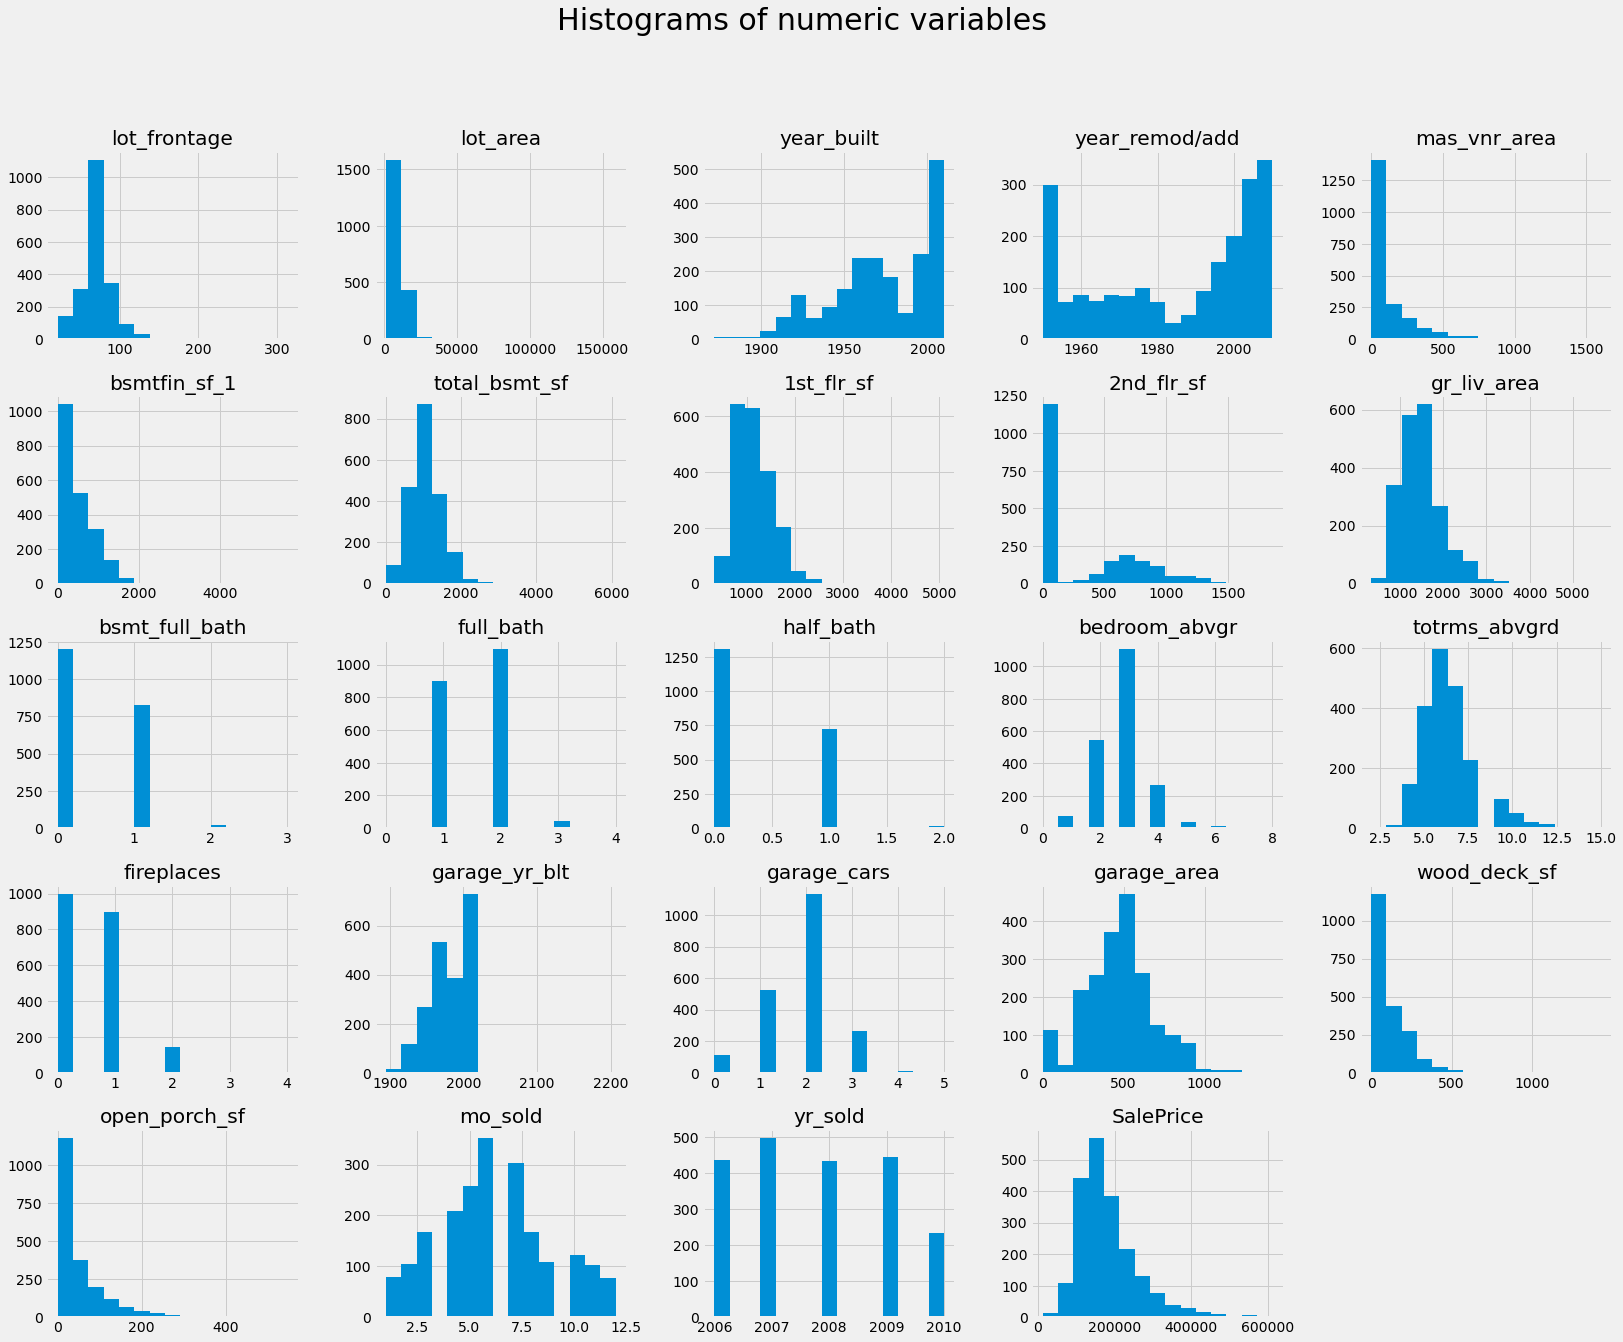

In [158]:
train_df_num.hist(figsize=(25,20), bins=15);
plt.suptitle('Histograms of numeric variables', fontsize=30);

In [155]:
def lmplots(dataframe, x, y, title, xlabel = None, ylabel = None):    
    sns.lmplot(x=x, y=y, data=dataframe, aspect=2, height=6, ci=None, scatter_kws={'color':'darkred'}, line_kws={'color':'green'})
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15, pad=15)
#     plt.xticks(ticks=np.arange(450,700,25), labels=[str(x) for x in np.arange(450,700,25)])
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

In [156]:
def boxplots(dataframe, list_of_cols, title='test', figsize=(15,7), c='red'):
    plt.figure(figsize=figsize)
    sns.boxplot(data=dataframe[list_of_cols], orient='h', color=c, whis=1.5)
    
    plt.title(title, fontsize=20)
    plt.xlabel(list_of_cols[0] + ' values', labelpad=20)
#     plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]) # Ticks = np.arange(25,300,25)
#     plt.xlim(10,400)
#     plt.yticks(ticks=[i for i in range(len(list_of_cols))],labels=list_of_cols)
#     plt.ylabel('Lot Frontage')

In [134]:
tick_list = np.arange(20,370,10)
tick_list

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290, 300, 310, 320, 330, 340, 350, 360])

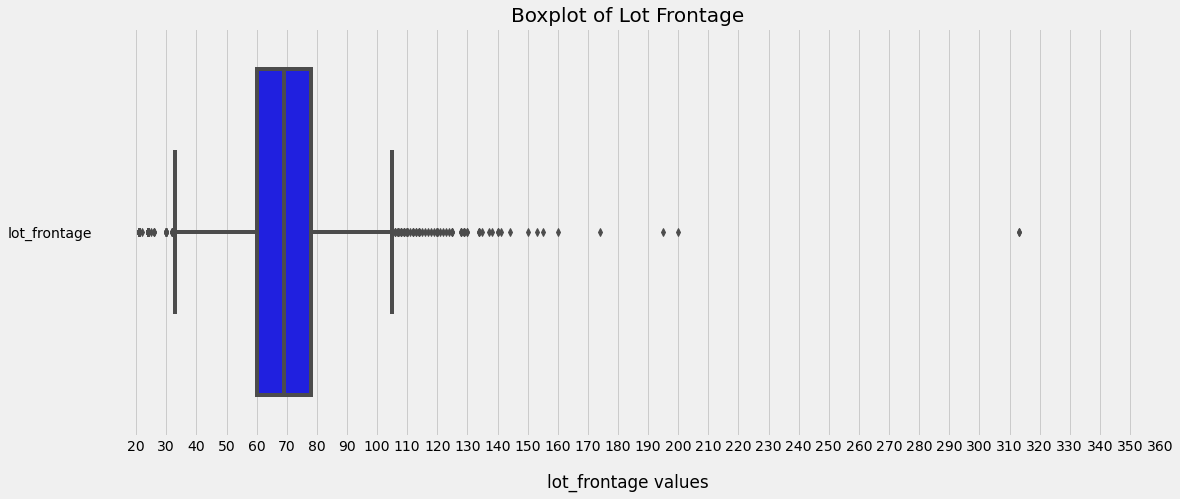

In [137]:
boxplots(train_df_num, ['lot_frontage'], 'Boxplot of Lot Frontage',(17,7), 'blue')
plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]); # Ticks = np.arange(25,300,25)
# plt.xlim(20,350)

<AxesSubplot:title={'center':'Histogram of lot frontage'}, ylabel='Frequency'>

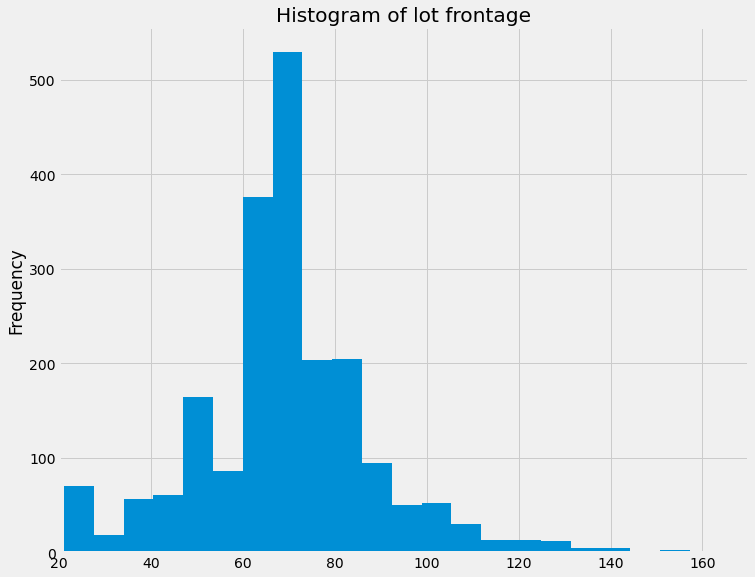

In [11]:
train_df_num['lot_frontage'].plot(kind='hist', bins=45, figsize=(11,9), xlim=(20,170), title='Histogram of lot frontage')

Most values fall between 60 ~ 80.

There are some outliers in lot_frontage

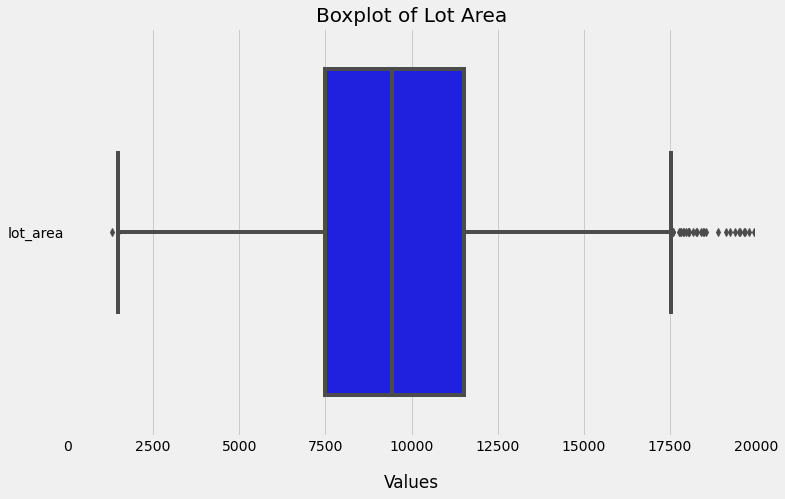

In [69]:
# Boxplot of Lot area
tick_list = np.arange(1050,20000,350)
boxplots(train_df_num, ['lot_area'], 'Boxplot of Lot Area', (11,7), 'blue')
# plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list], fontsize=15);
plt.xlim(0,20000);

<AxesSubplot:title={'center':'Histogram of lot area'}, ylabel='Frequency'>

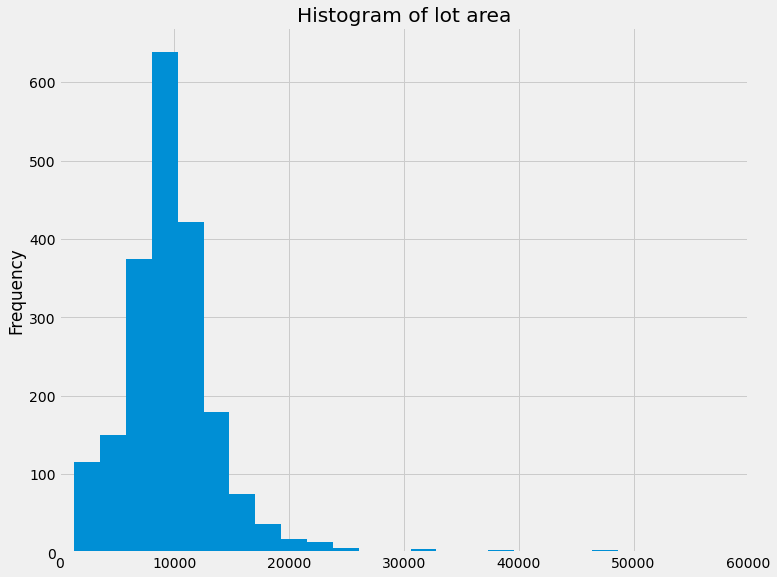

In [78]:
train_df_num['lot_area'].plot(kind='hist', bins=70, figsize=(11,9), xlim=(0,60000), title='Histogram of lot area')
# plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list], fontsize=15);

Most values of lot area fall between 7500 ~ 11550

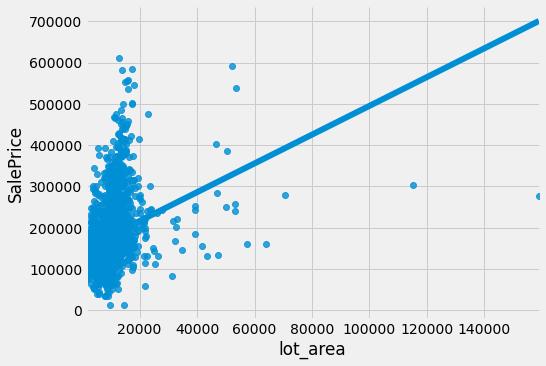

In [178]:
sns.lmplot(x='lot_area', y='SalePrice', data=train_df_num, aspect=1.5, ci=None);
# plt.title('Scatterplot between lot_frontage and SalePrice', title=5)

# Clearly the outliers are affecting the line of best fit, need to drop them.

In [161]:
np.corrcoef(x=train_df_num['lot_area'], y=train_df_num['SalePrice'])[0][1]

0.29656583236677875

There is a correlation of about **0.4 between lot_area and lot frontage**

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Drop the outliers with square feet of over 4000

In [ ]:
# Plotting the Gr Live Area with Sale price
plt.figure(figsize=(12,7))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train_df_num)

In [ ]:
# Rows with Above Grade Living Area Square Ft, drop them as they're outliers
train_df['Gr Liv Area'][train_df['Gr Liv Area'] > 4000]

In [ ]:
# Drop the outliers
train_df_num = train_df_num.drop(index=[960, 1995])
train_df_num.head()

In [ ]:
plt.figure(figsize=(25,15))
sns.pairplot(final_train_df)

## In Summary

**SAT tests**

The participation rate for SAT increases significantly for **Colorado** from 11% in 2017 to 100%. This also lead to a decrease in test scores for SAT.

The other states do not differ as much.

**Illinois** has a large increase in SAT participation with a 1000% increase in sat participation from 2017 to 2018


**ACT tests**

**Colorado** faced the biggest decline in participation rates of act 100% in 2017 to 30% in 2018.

Largest increase in participation rate for **Ohio** with about 33% increase in participation rates


**Do any states show have >50% participation on both tests either year?**

Only 3 states, Florida, Georgia and Hawaii showed more than 50% participation rates in both tests and years.

This shows that most students will take either 1 of the tests due to either time or financial constraints.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [ ]:
# mask = np.zeros_like(df.corr())
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(20,9))
# sns.heatmap(df.corr(),cmap='viridis',annot=True, mask = mask, annot_kws={'size':12})
# plt.title('Correlation between xxx and yyy attributes', fontsize=25)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

From the heatmap, there's high negative correlation between SAT and ACT participation rate with -84% in 2017 and -85% in 2018. This translates to states with high SAT participation rates are more likely to have low ACT participation rates, vice versa.

There's an interesting correlation between the score and participation rates. For SAT, the correlation between average total score and participation was -87% in 2017 and -79% in 2018. For ACT, the correlations were -86% in 2017 and -86% in 2018. This shows that the higher the participation, the lower the average total score. This is likely due to students who show greater interest taking the test in cases of low participation and the scores being lower for cases in high participation as the range of student skills become wider.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None,lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) > 2:
        figsize=(15,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    # Calculating Mean, Median and Mode
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().min()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'purple', 'yellow']
        #ax[i].hist(dataframe[column],bins=8, color=color) # feel free to add more settings
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[i], ax=ax[i])
        # Set titles, labels, etc here for each subplot
        
        # Plotting the Axes vline
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('State Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])

In [ ]:
# Plotting the histograms for each numeric variable
# plt.figure()
train_df_num.hist(figsize=(20,18), bins=15);

In [ ]:
# Showing the scatterplot against Sale Price for all numeric variables
# plt.figure(figsize=(25,25))
g = sns.pairplot(data=train_df_num, y_vars='SalePrice')
g.fig.set_size_inches(45,15)

In [ ]:
plt.figure(figsize=(11,7))
sns.boxplot(x='MS SubClass', y='SalePrice', data=train_df_num)

In [ ]:
sns.boxplot(x='Kitchen AbvGr', y='SalePrice', data=train_df_num)

In [ ]:
sns.scatterplot(x='MS SubClass', y='SalePrice', data=train_df_num);

In [ ]:
train_df_num_corr = pd.concat([train_df_num, train_df['SalePrice']], axis=1)

single_corr_heatmap(train_df_num_corr, ['SalePrice'], 'Blues_r')

## Preprocessing and Feature Engineering

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_df_cat_ord_encoded = ordinal_encoder.fit_transform(train_df_cat_ord)
train_df_cat_ord = pd.DataFrame(train_df_cat_ord_encoded, columns=train_df_cat_ord.columns.tolist())

In [ ]:
train_df_cat_ord.head()

In [ ]:
ordinal_encoder.categories_

In [ ]:
# Add back the Overall Qual ,Overall Cond, SalePrice
train_df_cat_ord = pd.concat([train_df_cat_ord,train_df[['Overall Qual' ,'Overall Cond', 'SalePrice']].astype('float')], axis=1)
train_df_cat_ord.head()

In [ ]:
# Plotting the heatmap for train_df_cat_ord
corr_heatmap(train_df_cat_ord, 'magma')

In [ ]:
train_df_cat_dummy = pd.get_dummies(train_df_cat_nominal, drop_first=True)
train_df_cat_dummy
# plt.figure(figsize=(20,20))
# sns.heatmap(train_df_cat_dummy.corr(),cmap='viridis')

In [ ]:
# Nominal variables transformed to dummy variables
train_df_cat_dummy.head()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_df_num_scaled = scaler.fit_transform(train_df_with_0)
# train_df_num_with_0 = pd.DataFrame(train_df_num_scaled, columns=[train_df_with_0.columns])
# train_df_num_with_0.head()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## Plotting the participation rates for SAT and ACT 2017 and 2018

In [ ]:
subplot_histograms(final_sat_act, ['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], 'Participation rates', 
                   sup_title='SAT and ACT participation rate')

In [ ]:
final_sat_act[['act_17_participation', 'act_18_participation']].agg(['mean', 'median'])

Most of the participation rate is between **0-10%** for **SAT**.

There seems to be about **25%** increase in SAT participation from 2017 to 2018 judging from the *mean values*.

Participation rate for **ACT** is much higher compared to SAT. Also, the participation rates do not differ as much year to year.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


## SAT and ACT 2017 math scores

In [ ]:
lmplots(final_sat_act, 'sat_17_math', 'act_17_math', 
        'SAT and ACT 17 math scores', 'SAT 2017 math scores', 
        'ACT 2017 math scores')

The scatter points are dispersed and a negative line of best fit is plotted. This shows a negative weak correlation between the variables.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

## SAT and ACT participation box plots

In [ ]:
def boxplots(dataframe, title, xlabel = None, yticklabels = None, palette='coolwarm'):    
    plt.figure(figsize=(11,7))
    sns.boxplot(data=dataframe, orient='h', palette=palette, width=0.5)
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=20, pad=15)
    plt.xlabel(xlabel, labelpad=20, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(ticks=[tick for tick in range(len(dataframe.columns))], labels= yticklabels, fontsize=15)
    plt.show()

In [ ]:
all_part = final_sat_act[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']]
boxplots(all_part, 'Participation rates for SAT and ACT test', 'Participation rates in (%)', ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], palette='viridis')

# Merge Dataframes

Join the train_df_num, train_df_cat_nom, train_df_cat_ord dataframes and assigned this to final_train_df.

In [ ]:
#Code:
# combined_2017 = sat_2017.merge(act_2017,on='state')
# combined_2017.head()
final_train_df = pd.concat([train_df_num, train_df_cat_nom, train_df_cat_ord], axis=1)
final_train_df.head()

In [ ]:
# No null values found in the final train df
final_train_df[final_train_df.isnull().any(axis=1)]

In [ ]:
# No more null values
final_train_df.isnull().sum().sum()

In [ ]:
# Checking if there are any SalePrice in the column
final_train_df.columns.str.contains('SalePrice').sum()

In [ ]:
# No duplicated columns
final_train_df.columns.duplicated().sum()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The skewness of the data, right / left skewed? 

The spread of the data, your standard deviation. (look at your histogram)

Central Tendency - Mean, Median, Mode

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on my analysis, the three states that I've chosen to investigate Colorado, Illinois and Arkansas. Colorado's SAT participation rate has increased from 11% to 100% from 2017 to 2018 while their ACT participation rate has decreased from 100% to 30%. A similiar trend was found in Illinois where the participation rate has increased from 9% in 2017 to to 99% in 2018 while their ACT participation rate has decreased from 93% to 43%. Arkansas' participation rate for SAT remains the lowest year-to-year while their participation rate for ACT tests is one of the highest.

Colorado state officials switched from the mandatory ACT to the mandatory SAT which resulted in a decrease in ACT participation and an increase in SAT participation. The reason behind the switch is that the Colorado Department of Education (CDE) remarked the exam is more closely aligned to the state's academic standards and to prepare them for life after high school. (1) (2)

According to the Chicago Tribune, Illinois State Board of Education (ISBE) made the switch as well from ACT the SAT after weighing the attributes of both exams and decided SAT's standards was better aligned with Illinois. (3)

For both states, the average scores for SAT decreases significantly as a greater number of students took the test while the average scores for the ACT increased as a result of a smaller group of students taking it. For instance, Colorado's SAT scores went from 1201 in 2017 to 1025 in 2018 while the ACT average score went from 20.8 in 2017 to 23.9 in 2018.

In Arkansas, the ACT is used as an admission requirement to enter colleges or universities which is why there's a a very high participation rate for ACT and it's considered an "ACT state". (4) (5)

### References

* [Testive](https://www.testive.com/colorado-sat-change-2017/) (1) 

* [Chalkbeat](https://co.chalkbeat.org/2017/8/17/21100853/sat-scores-show-mixed-results-on-whether-colorado-juniors-are-on-track-for-college) (2)

* [Chicagotribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) (3)

* [University of Arkansas](https://admissions.uark.edu/apply/test-scores/index.php) (4)

* [Arkansas Department of Education](http://dese.ade.arkansas.gov/divisions/learning-services/assessment/the-act) (5)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After reviewing the state college entrance exam testing policy and examining the datasets, there is clear evidence that the respective state's policy has a huge influence in the student's participation in these tests. Currently, there are 25 states that require students to take the [SAT or ACT](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html).

For the tests participation to increase, states can choose to enact a policy of making one of the two tests a mandatory high school graduation requirement if they have not done so. This provides benefits to the state's education systems and to the students. One advantage would be that the standardized test can be used to measure the effectiveness of the high-school educational systems. It can also be used to benchmark students and provides students the guidance to complete one common college application requirement. This will be useful in guiding students to consider their school of choice.  

Let's look at Illinois, where students are mandated to take a standardized test to enter colleges and universities. After Illinois State Board of Education (ISBE) reviewed both tests,  ISBE switched to SAT from ACT. This resulted a large decrease in ACT participation and a large increase in SAT participation from 2017 to 2018. These changes in participation were followed by a decrease in average score for the SAT and an increase in ACT average scores. This shows what happens when a state make a test mandatory - a large drop in the participation rate of the other test.

To resolve this, states need to provide incentives to encourage students to take both tests. Incentives such as giving students time off for test taking, subsidizing the fees and integrating the test into high school curriculum can help to remove the barriers.

Research into other factors such as the median household incomes for each state to see if there's any corrleations into the participation rates would be useful to increase the participation rates.